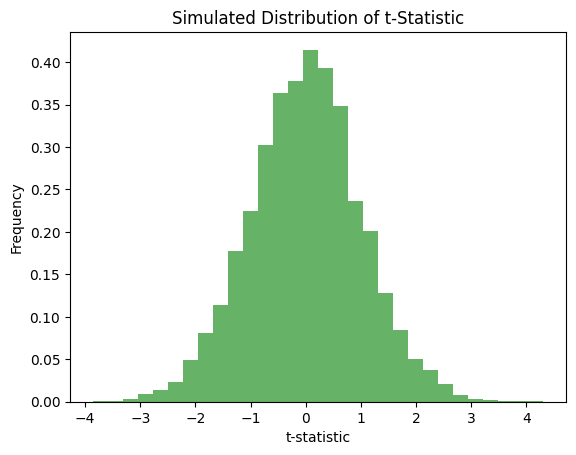

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_t_distribution(iterations=10000, sample_size=30, mean=0, std_dev=1):
    t_statistics = []

    for _ in range(iterations):
        # Generate two independent samples
        sample1 = np.random.normal(mean, std_dev, sample_size)
        sample2 = np.random.normal(mean, std_dev, sample_size)

        # Calculate the t-statistic
        mean1, mean2 = np.mean(sample1), np.mean(sample2)
        std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
        pooled_std = np.sqrt(((std1**2) + (std2**2)) / 2)
        t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(2/sample_size))
        t_statistics.append(t_statistic)

    return t_statistics

# Running the simulation
t_statistics = monte_carlo_t_distribution()

# Plotting the results
plt.hist(t_statistics, bins=30, density=True, alpha=0.6, color='g')
plt.title("Simulated Distribution of t-Statistic")
plt.xlabel("t-statistic")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_W_distribution(iterations=10000, sample_size=5, mean=0, std_dev=1):
    t_statistics = []

    for _ in range(iterations):
        # Generate sample
        sample = np.random.normal(mean, std_dev, sample_size)
        sample = np.sort(sample)
        
        # Calculate the W-statistic
        mean1, mean2 = np.mean(sample1), np.mean(sample2)
        std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
        pooled_std = np.sqrt(((std1**2) + (std2**2)) / 2)
        t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(2/sample_size))
        t_statistics.append(t_statistic)

    return t_statistics

# Running the simulation
t_statistics = monte_carlo_t_distribution()

# Plotting the results
plt.hist(t_statistics, bins=30, density=True, alpha=0.6, color='g')
plt.title("Simulated Distribution of t-Statistic")
plt.xlabel("t-statistic")
plt.ylabel("Frequency")
plt.show()

In [12]:
np.random.seed(2609)
sample1 = np.random.normal(0, 1, 10)
sample1

array([ 2.35676065,  1.03004855, -2.02258982,  0.38352852, -0.6062667 ,
       -1.19155678,  0.17339892,  1.30640262, -0.81895459,  1.45529678])

In [13]:
np.sort(sample1)

array([-2.02258982, -1.19155678, -0.81895459, -0.6062667 ,  0.17339892,
        0.38352852,  1.03004855,  1.30640262,  1.45529678,  2.35676065])